***
# <font color=indianred size=10>COVID DATA VISUALIZATION</font>
***

# <font color=lightcoral>1) INTRODUCTION</font>
***

This dataset intend to track COVID-19 vaccination evolution, focused in understanding the situation in Brazil comparing with the other countries

To compare the situation, in some parts of this dataset, 7 countries were be chosen. 
    They are: 
        - Argentina, 
        - Brazil, 
        - Chile,
        - China,
        - Italy,
        - United Kingdom
        - United States

The source of data is https://ourworldindata.org/covid-deaths and they have a lot of more information there.

<n>Last update: 22/03/2021 

# <font color=lightcoral>2) IMPORTING DATA AND LIBRARIES</font>
***

In [104]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import datetime
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv('df_covid.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].map(lambda x:str(x)!="World")]
df = df[df['location'].map(lambda x:str(x)!="South America")]
df = df[df['location'].map(lambda x:str(x)!="Asia")]
df = df[df['location'].map(lambda x:str(x)!="North America")]
df = df[df['location'].map(lambda x:str(x)!="Europe")]
df = df[df['location'].map(lambda x:str(x)!="European Union")]
df = df[df['location'].map(lambda x:str(x)!="Africa")]
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


# <font color=lightcoral>3) WORLD OVERVIEW</font>
***

In [106]:
overview = df.groupby(["location", "iso_code"])['population', 'population_density', 'median_age', 'gdp_per_capita',
                                                                      'human_development_index', 
                                                                      ].max().reset_index()
overview.head(1)

,location,iso_code,population,population_density,median_age,gdp_per_capita,human_development_index
0,Afghanistan,AFG,38928341.0,54.422,18.6,1803.987,0.511


# <font color=lightcoral>3.1) POPULATION</font>
***

Text(0.5,0.98,'WORLD POPULATION')

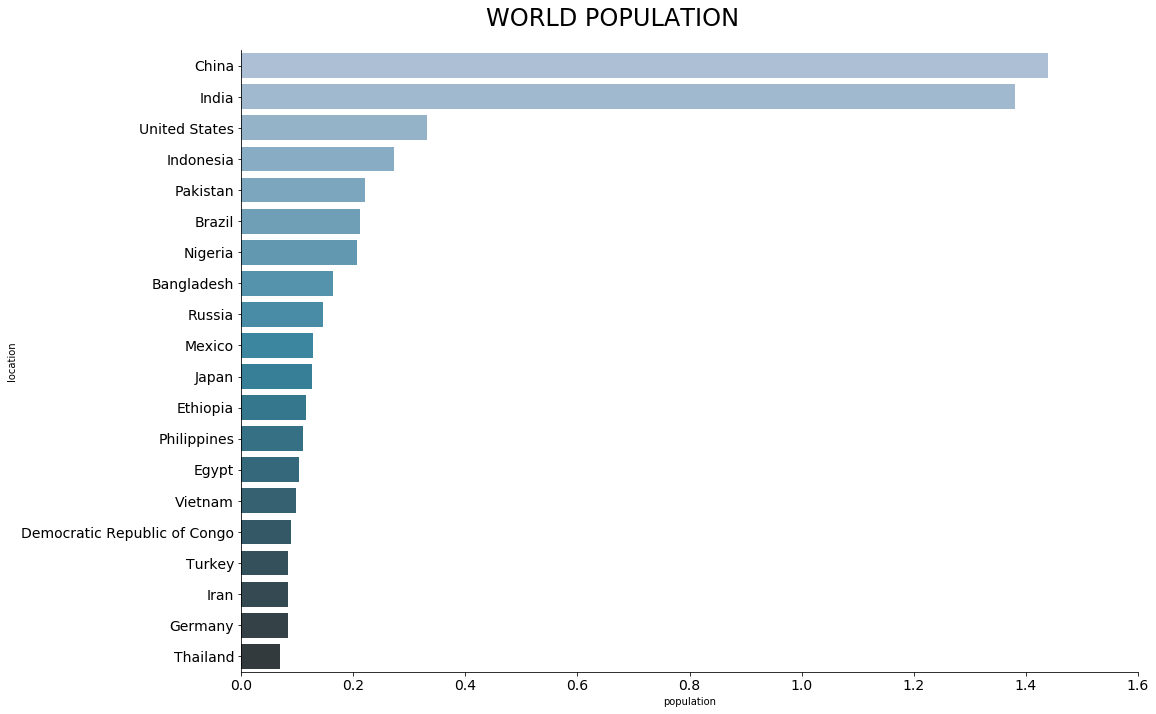

In [107]:
top20_population = overview.nlargest(20,'population')
ax = sns.factorplot(x="population", y="location",  data = top20_population , kind="bar", 
                    size=10, aspect=1.5, palette='PuBuGn_d')
ax.set_xticklabels(fontsize=14)
ax.set_yticklabels(fontsize=14)
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('WORLD POPULATION', fontsize=24)

In [108]:
fig = px.choropleth(overview,                        
                     locations="iso_code",          
                     color="population",                 
                     hover_name="location",              
                     projection="natural earth",       
                     color_continuous_scale= 'tempo', 
                     range_color=[0,1450000000])             
fig.show()  

# <font color=lightcoral>3.2) MEDIAN AGE</font>
***

In [109]:
fig = px.choropleth(overview,                          
                     locations="iso_code",           
                     color="median_age",                  
                     hover_name="location",             
                     projection="natural earth",     
                     color_continuous_scale= 'tempo',  
                     range_color=[10,60])             
fig.show() 

# <font color=lightcoral>3.3) HUMAN DEVELOPMENT INDEX</font>
***

In [110]:
fig = px.choropleth(overview,                          
                     locations="iso_code",          
                     color="human_development_index",                   
                     hover_name="location",              
                     projection="natural earth",       
                     color_continuous_scale= 'tempo',
                     range_color=[0.3,1])             
fig.show()   

# <font color=lightcoral>4) DEATHS INFORMATIONS</font>
***

In [111]:
deaths_total = df.groupby(["location", "iso_code"])['total_deaths', 'total_deaths_per_million',
                                                                      ].max().sort_values(by='total_deaths', ascending=False).reset_index()
deaths_total.head(1)

,location,iso_code,total_deaths,total_deaths_per_million
0,United States,USA,542356.0,1638.525


# <font color=lightcoral>4.1) WORLD TOTAL DEATHS</font>
***

In [112]:
fig = px.treemap(deaths_total, path = ['location'], values = 'total_deaths')
fig.show()

In [113]:
fig = px.choropleth(deaths_total,                         
                     locations="iso_code",           
                     color="total_deaths",                  
                     hover_name="location",             
                     projection="natural earth",       
                     color_continuous_scale= 'tempo',  
                     range_color=[0,600000])            
fig.show()  

# <font color=lightcoral>4.2) WORLD TOTAL DEATHS PER MILLION</font>
***

Text(0.5,0.98,'WORLD TOTAL DEATHS PER MILLION')

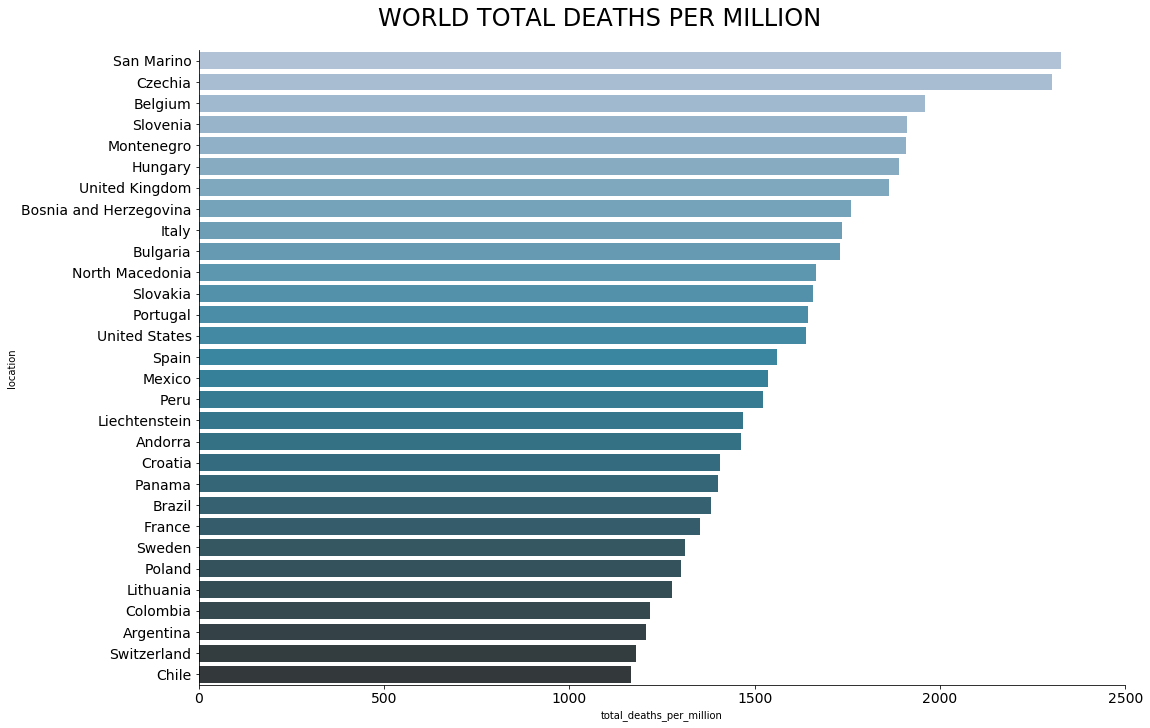

In [114]:
top30_deaths_million = deaths_total.nlargest(30,'total_deaths_per_million')
ax = sns.factorplot(x="total_deaths_per_million", y="location",  data = top30_deaths_million , kind="bar", 
                    size=10, aspect=1.5, palette='PuBuGn_d')
ax.set_xticklabels(fontsize=14)
ax.set_yticklabels(fontsize=14)
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('WORLD TOTAL DEATHS PER MILLION', fontsize=24)

In [115]:
fig = px.choropleth(deaths_total,                        
                     locations="iso_code",          
                     color="total_deaths_per_million",                  
                     hover_name="location",              
                     projection="natural earth",        
                     color_continuous_scale= 'tempo',  
                     range_color=[0,2300])           
fig.show()  

# <font color=lightcoral>4.2) DAILY DEATHS</font>
***

In [116]:
new_deaths = df[(df["location"]=="Brazil") |(df["location"]=="Mexico")|(df["location"]=='United States') |(df["location"]=='United Kingdom') |(df["location"]=='China') |(df["location"]=='Italy')|(df["location"]=='Argentina')]
new_deaths.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2747,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845


In [117]:
new_deaths['rol7'] = new_deaths.new_deaths.rolling(7).mean().shift(0)

fig = px.line(new_deaths, x="date", y="rol7", color='location', title='Daily Deaths (Moving Average)')
fig.show()

In [118]:
new_deaths['rol7_x'] = new_deaths.new_deaths_per_million.rolling(7).mean().shift(0)

fig = px.line(new_deaths, x="date", y="rol7_x", color='location', title='Daily Deaths per Million (Moving Average)')
fig.show()

# <font color=lightcoral>5) WORLD VACCINATION</font>
***

In [119]:
vaccine = df.groupby(["location", "iso_code"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'new_vaccinations',
                                                                      'new_vaccinations_smoothed',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
vaccine.columns = ["Country", "iso_code", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']
vaccine.head(5)

,Country,iso_code,Total vaccinations,Percent,Daily vaccinations,Daily vaccinations per million,People vaccinated,People vaccinated per hundred,People fully vaccinated,People fully vaccinated percent
0,Afghanistan,AFG,54000.0,0.14,NaN,2862.0,54000.0,0.14,NaN,NaN
1,Albania,ALB,33369.0,1.16,1348.0,1679.0,6073.0,0.21,655.0,0.02
2,Algeria,DZA,75000.0,0.17,30.0,3748.0,NaN,NaN,NaN,NaN
3,Andorra,AND,4914.0,6.36,NaN,264.0,3650.0,4.72,1264.0,1.64
4,Angola,AGO,49000.0,0.15,NaN,4283.0,49000.0,0.15,NaN,NaN


# <font color=lightcoral>5.1) TOTAL VACCINATION</font>
***

In [120]:
fig = px.treemap(vaccine, path = ['Country'], values = 'Total vaccinations',
                title="TOTAL VACCINES PER COUNTRY")
fig.show()

In [121]:
fig = px.choropleth(vaccine,                           
                     locations="iso_code",           
                     color="Total vaccinations",                  
                     hover_name="Country",              
                     projection="natural earth",        
                     color_continuous_scale= 'tempo',
                     range_color=[0,125000000])         
fig.show()  

# <font color=lightcoral>5.2) PERCENT OF POPULATION VACCINATED</font>
***

Text(0.5,0.98,'Percent Vaccine per Country')

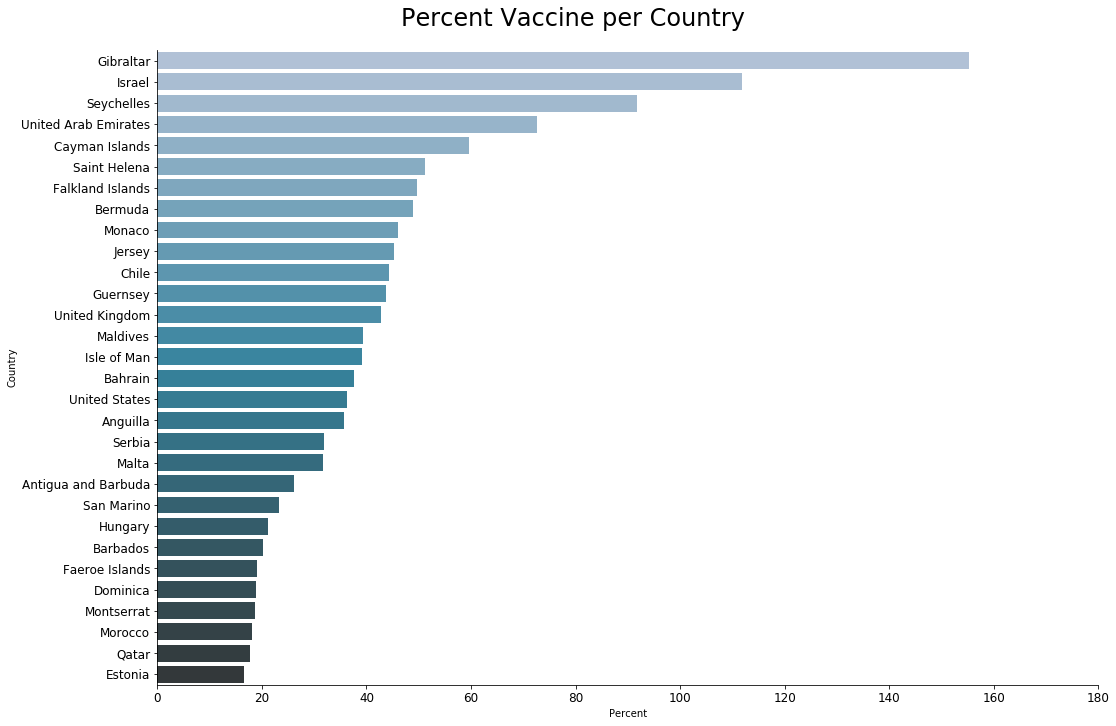

In [122]:
top30_percent_vaccine = vaccine.nlargest(30,'Percent')
ax = sns.factorplot(x="Percent", y="Country",  data = top30_percent_vaccine , kind="bar", 
                    size=10, aspect=1.5, palette='PuBuGn_d')
ax.set_xticklabels(fontsize=12)
ax.set_yticklabels(fontsize=12)
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('Percent Vaccine per Country', fontsize=24)

In [123]:
fig = px.choropleth(vaccine,                           
                     locations="iso_code",           
                     color="Percent",                    
                     hover_name="Country",              
                     projection="natural earth",       
                     color_continuous_scale= 'tempo', 
                     range_color=[0,100])          
fig.show()  

# <font color=lightcoral>5.3) PEOPLE FULLY VACCINATED</font>
***

Text(0.5,0.98,'People Fully Vaccinated')

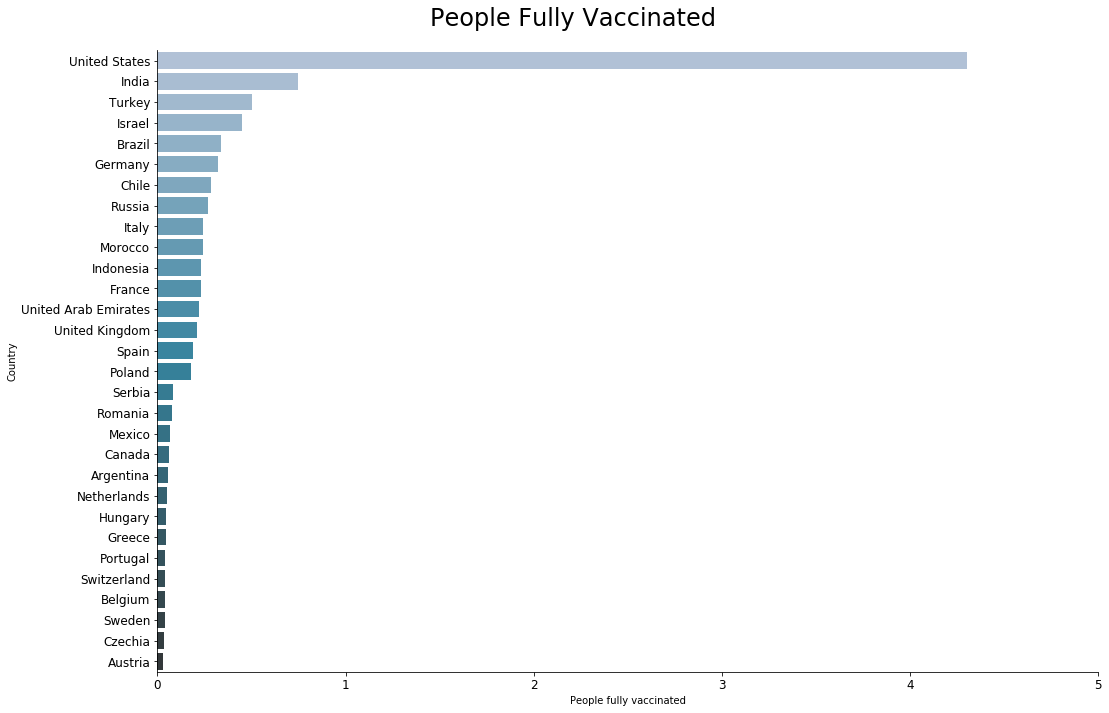

In [124]:
top30_fully_vaccinated = vaccine.nlargest(30,'People fully vaccinated')
ax = sns.factorplot(x="People fully vaccinated", y="Country",  data = top30_fully_vaccinated , kind="bar", 
                    size=10, aspect=1.5, palette='PuBuGn_d')
ax.set_xticklabels(fontsize=12)
ax.set_yticklabels(fontsize=12)
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('People Fully Vaccinated', fontsize=24)

In [125]:
fig = px.choropleth(vaccine,                           
                     locations="iso_code",          
                     color="People fully vaccinated",                  
                     hover_name="Country",              
                     projection="natural earth",        
                     color_continuous_scale= 'tempo',  
                     range_color=[0,45000000])              
fig.show()  

# <font color=lightcoral>5.4) PERCENT OF PEOPLE FULLY VACCINATED</font>
***

In [126]:
fig = px.choropleth(vaccine,                         
                     locations="iso_code",          
                     color="People fully vaccinated percent",              
                     hover_name="Country",             
                     projection="natural earth",        
                     color_continuous_scale= 'tempo',  
                     range_color=[0,100])               
fig.show() 

# <font color=lightcoral>5.5) DAILY VACCINATIONS</font>
***

In [127]:
vac_daily = df[(df["location"]=="Brazil") |(df["location"]=="Mexico")|(df["location"]=='United States') |(df["location"]=='United Kingdom') |(df["location"]=='Chile')  |(df["location"]=="China") |(df["location"]=="Italy") |(df["location"]=='Argentina')]
vac_daily = vac_daily[(vac_daily['date'] > '2021-01-01') & (vac_daily['date'] < '2021-04-01')]
vac_daily.tail(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72849,USA,North America,United States,2021-03-20,29785285.0,55285.0,54961.714,541927.0,783.0,1021.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
72850,USA,North America,United States,2021-03-21,29818528.0,33243.0,54250.429,542356.0,429.0,1000.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [128]:
vac_daily['rol7'] = vac_daily.new_vaccinations_smoothed.rolling(7).mean().shift(0)

fig = px.line(vac_daily, x="date", y="rol7", color='location', title='Daily Vaccinations')
fig.show()

In [129]:
vac_daily['rol7_x'] = vac_daily.new_vaccinations_smoothed_per_million.rolling(7).mean().shift(0)

fig = px.line(vac_daily, x="date", y="rol7_x", color='location', title='Daily Vaccinations per Million')
fig.show()

***
# <font color=black size=16>TO BE CONTINUED...</font>
***